# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"


    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make the API request
        response = requests.get(city_url)
        city_weather = response.json()
        city_weather
        # Parse the JSON and retrieve data
        if response.status_code == 200:
            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather['coord']['lat']
            city_lng = city_weather['coord']['lon']
            city_max_temp = city_weather['main']['temp_max']
            city_humidity = city_weather['main']['humidity']
            city_clouds = city_weather['clouds']['all']
            city_wind = city_weather['wind']['speed']
            city_country = city_weather['sys']['country']
            city_date = city_weather['dt']

            # Append the city information into city_data list
            city_data.append({
                "City": city,
                "Lat": city_lat,
                "Lng": city_lng,
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date
            })

        else:
            print(f"City not found. Skipping {city_url}...")

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"Error occurred for city {city}: {e}")
        pass

    # Pause to avoid hitting API rate limits (1 second pause)
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port lincoln
Processing Record 2 of Set 1 | katsina-ala
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | gadzhiyevo
Processing Record 6 of Set 1 | levuka
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | isafjordur
Processing Record 10 of Set 1 | st. john's
Processing Record 11 of Set 1 | machico
Processing Record 12 of Set 1 | codrington
Processing Record 13 of Set 1 | shenjiamen
Processing Record 14 of Set 1 | peremyshlyany
Processing Record 15 of Set 1 | west island
Processing Record 16 of Set 1 | kone
Processing Record 17 of Set 1 | dzuunharaa
Processing Record 18 of Set 1 | puerto natales
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | dem'yanovo
Processing Record 21 of Set 1 | kudahuvadhoo
Processing Record 22 of Set 1 | f

Processing Record 33 of Set 4 | san clemente del tuyu
Processing Record 34 of Set 4 | sakaiminato
Processing Record 35 of Set 4 | kirakira
Processing Record 36 of Set 4 | tanjung pandan
Processing Record 37 of Set 4 | oliver
Processing Record 38 of Set 4 | hamina
Processing Record 39 of Set 4 | dunedin
Processing Record 40 of Set 4 | puerto baquerizo moreno
Processing Record 41 of Set 4 | weno
Processing Record 42 of Set 4 | udachny
Processing Record 43 of Set 4 | mejit
Processing Record 44 of Set 4 | tatui
Processing Record 45 of Set 4 | tatarsk
Processing Record 46 of Set 4 | inekar
City not found. Skipping http://api.openweathermap.org/data/2.5/weather?q=inekar&appid=32e625436aae742f14f597fabf50d561&units=metric...
Processing Record 47 of Set 4 | xiangyang
Processing Record 48 of Set 4 | ola
Processing Record 49 of Set 4 | mirny
Processing Record 0 of Set 5 | bardai
Processing Record 1 of Set 5 | mount isa
Processing Record 2 of Set 5 | puerto deseado
Processing Record 3 of Set 5 | 

Processing Record 47 of Set 7 | susuman
Processing Record 48 of Set 7 | alamogordo
Processing Record 49 of Set 7 | fuente obejuna
Processing Record 0 of Set 8 | kulia village
City not found. Skipping http://api.openweathermap.org/data/2.5/weather?q=kulia village&appid=32e625436aae742f14f597fabf50d561&units=metric...
Processing Record 1 of Set 8 | cabo san lucas
Processing Record 2 of Set 8 | praia
Processing Record 3 of Set 8 | kindu
Processing Record 4 of Set 8 | port mathurin
Processing Record 5 of Set 8 | zarghun shahr
Processing Record 6 of Set 8 | saint-francois
Processing Record 7 of Set 8 | nova vicosa
Processing Record 8 of Set 8 | batie
Processing Record 9 of Set 8 | morehead city
Processing Record 10 of Set 8 | burela de cabo
Processing Record 11 of Set 8 | sabalgarh
Processing Record 12 of Set 8 | borkum
Processing Record 13 of Set 8 | ulsteinvik
Processing Record 14 of Set 8 | remire-montjoly
Processing Record 15 of Set 8 | saldanha
Processing Record 16 of Set 8 | island ha

Processing Record 47 of Set 10 | iskateley
Processing Record 48 of Set 10 | sambava
Processing Record 49 of Set 10 | nar'yan-mar
Processing Record 0 of Set 11 | el calafate
Processing Record 1 of Set 11 | kargasok
Processing Record 2 of Set 11 | dryden
Processing Record 3 of Set 11 | savave village
City not found. Skipping http://api.openweathermap.org/data/2.5/weather?q=savave village&appid=32e625436aae742f14f597fabf50d561&units=metric...
Processing Record 4 of Set 11 | onega
Processing Record 5 of Set 11 | ijuw
City not found. Skipping http://api.openweathermap.org/data/2.5/weather?q=ijuw&appid=32e625436aae742f14f597fabf50d561&units=metric...
Processing Record 6 of Set 11 | greymouth
Processing Record 7 of Set 11 | kristiansund
Processing Record 8 of Set 11 | zabol
Processing Record 9 of Set 11 | vadso
Processing Record 10 of Set 11 | gdov
Processing Record 11 of Set 11 | astrakhan
Processing Record 12 of Set 11 | sweetwater
Processing Record 13 of Set 11 | san luis acatlan
Processin

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port lincoln,-34.7333,135.8667,13.94,90,99,1.30,AU,1727185511
1,katsina-ala,7.1667,9.2833,27.42,79,95,1.94,NG,1727185512
2,blackmans bay,-43.0167,147.3167,12.63,73,100,0.45,AU,1727185513
3,edinburgh of the seven seas,-37.0676,-12.3116,11.07,81,90,5.24,SH,1727185515
4,gadzhiyevo,69.2551,33.3362,5.42,89,100,12.86,RU,1727185516


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port lincoln,-34.7333,135.8667,13.94,90,99,1.30,AU,1727185511
1,katsina-ala,7.1667,9.2833,27.42,79,95,1.94,NG,1727185512
2,blackmans bay,-43.0167,147.3167,12.63,73,100,0.45,AU,1727185513
3,edinburgh of the seven seas,-37.0676,-12.3116,11.07,81,90,5.24,SH,1727185515
4,gadzhiyevo,69.2551,33.3362,5.42,89,100,12.86,RU,1727185516


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

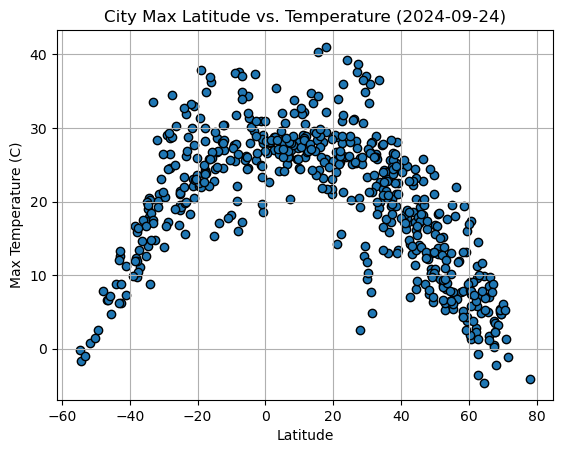

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor='black', marker='o')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2024-09-24)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

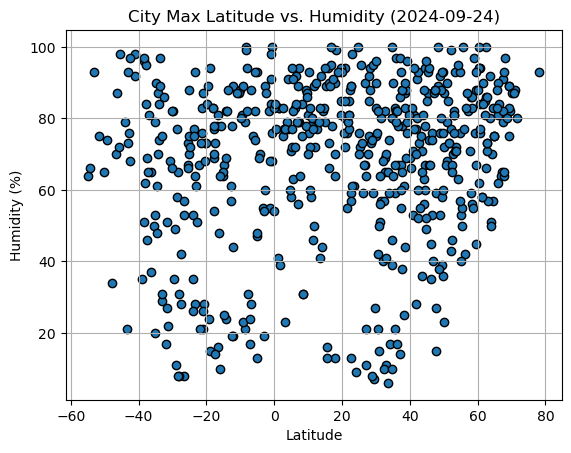

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor='black', marker='o')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Humidity (2024-09-24)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

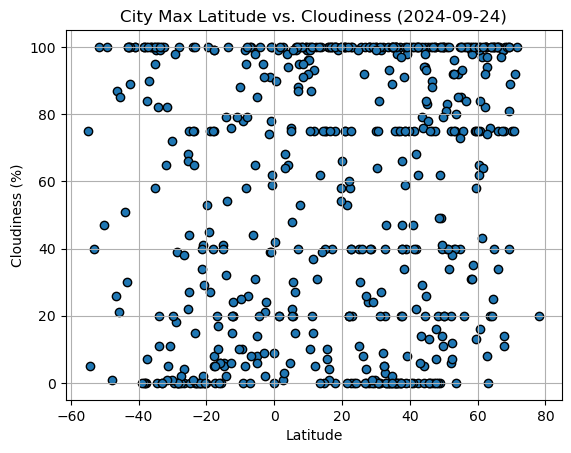

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor='black', marker='o')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Cloudiness (2024-09-24)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

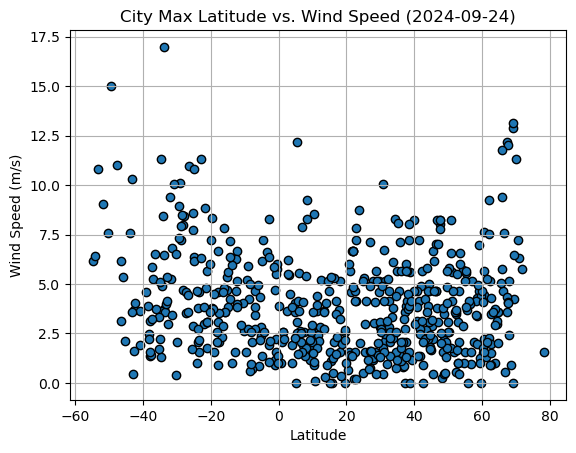

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor='black', marker='o')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Wind Speed (2024-09-24)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y, ann_x, ann_y, x_label='X-axis', y_label='Y-axis', title='Linear Regression Plot'):
    # Perform linear regression using arguments 
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    value = 12345.6789
    np.set_printoptions(suppress=True)
    print(f'The r^2-value is: {r_value**2}')
    # Calculate predicted y values
    y_pred = slope * np.array(x) + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create the scatter plot
    plt.scatter(x, y, color='blue', edgecolor='black', label='Data Points')
    plt.plot(x, y_pred, color='red', linewidth=2, label='Regression Line')
    plt.annotate(line_eq,(ann_x,ann_y),fontsize=15,color="red")
    # Add titles and labels
    # title: Title of the plot (str)
    plt.title(title)
    # x_label: Label for the x-axis (str)
    plt.xlabel(x_label)
    # y_label: Label for the y-axis (str)
    plt.ylabel(y_label)
    plt.legend()
    plt.grid()

    # Show the plot
    plt.show()


In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,katsina-ala,7.1667,9.2833,27.42,79,95,1.94,NG,1727185512
4,gadzhiyevo,69.2551,33.3362,5.42,89,100,12.86,RU,1727185516
5,levuka,50.1834,-105.4011,9.85,87,20,2.57,CA,1727185517
7,iqaluit,63.7506,-68.5145,4.85,80,20,1.03,CA,1727185520
8,isafjordur,66.0755,-23.1240,7.02,81,75,4.63,IS,1727185521


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port lincoln,-34.7333,135.8667,13.94,90,99,1.30,AU,1727185511
2,blackmans bay,-43.0167,147.3167,12.63,73,100,0.45,AU,1727185513
3,edinburgh of the seven seas,-37.0676,-12.3116,11.07,81,90,5.24,SH,1727185515
6,ushuaia,-54.8000,-68.3000,-0.19,64,75,6.17,AR,1727185446
11,codrington,-38.2667,141.9667,12.27,96,100,2.46,AU,1727185524


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.6760380137090737


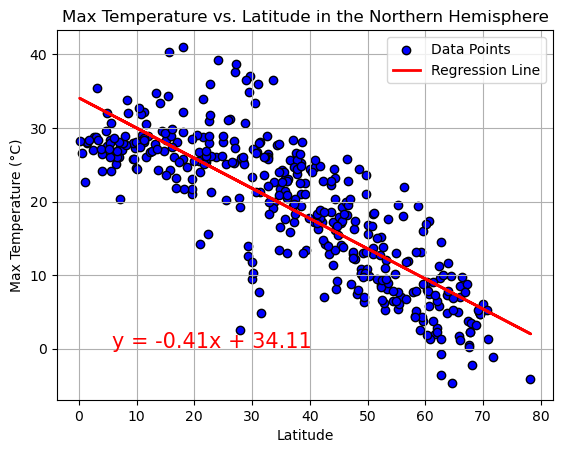

In [19]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Max Temp'],
    ann_x = 5.8, 
    ann_y = 0.1,
    x_label='Latitude',
    y_label='Max Temperature (°C)',
    title='Max Temperature vs. Latitude in the Northern Hemisphere'
)

The r^2-value is: 0.5629308003164815


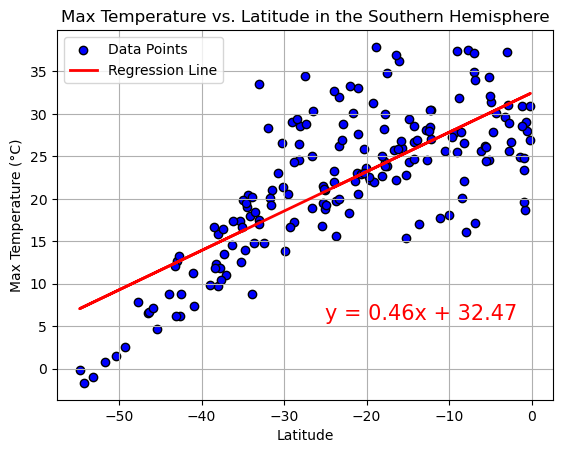

In [20]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df['Lat'],
    southern_hemi_df['Max Temp'],
    ann_x = -25, 
    ann_y = 5.8,
    x_label='Latitude',
    y_label='Max Temperature (°C)',
    title='Max Temperature vs. Latitude in the Southern Hemisphere'
)

**Discussion about the linear relationship:** Our analysis supports that temperature decreases as one moves away from the equator, but other factors may can cause deviations from the expected linear relationship.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.0035890742723432303


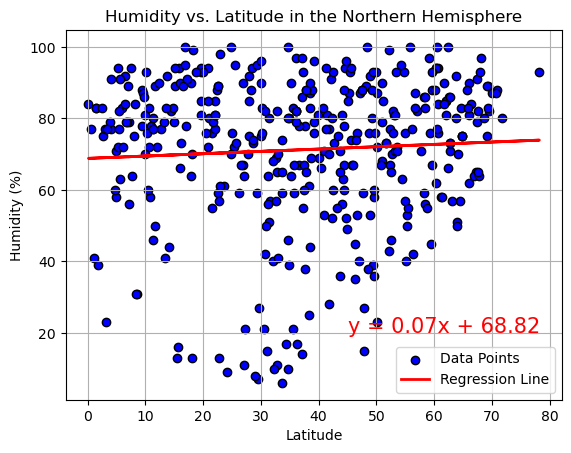

In [21]:
# Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Humidity'],
    ann_x = 45, 
    ann_y = 20,
    x_label='Latitude',
    y_label='Humidity (%)',
    title='Humidity vs. Latitude in the Northern Hemisphere'
)

The r^2-value is: 0.00014070334653293033


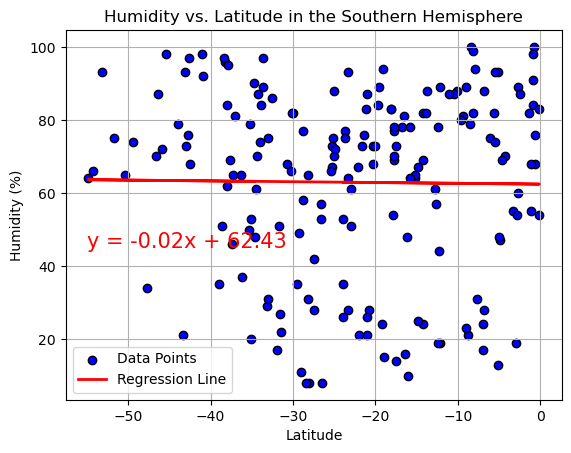

In [22]:
# Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df['Lat'],
    southern_hemi_df['Humidity'],
    ann_x = -55, 
    ann_y = 45,
    x_label='Latitude',
    y_label='Humidity (%)',
    title='Humidity vs. Latitude in the Southern Hemisphere'
)

**Discussion about the linear relationship:** While latitude plays a significant role in determining temperature, its impact on humidity is far less direct and more heavily moderated by local and regional factors. This leads to a weaker linear relationship between humidity and latitude in comparison to temperature and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.007129593471208688


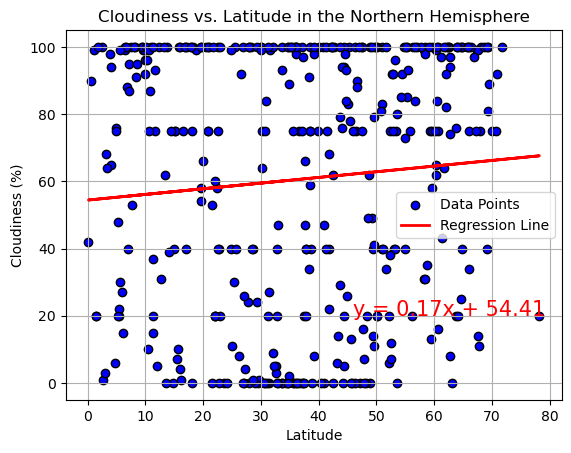

In [23]:

# Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Cloudiness'],
    ann_x = 46, 
    ann_y = 20,
    x_label='Latitude',
    y_label='Cloudiness (%)',
    title='Cloudiness vs. Latitude in the Northern Hemisphere'
)

The r^2-value is: 0.01001254513196431


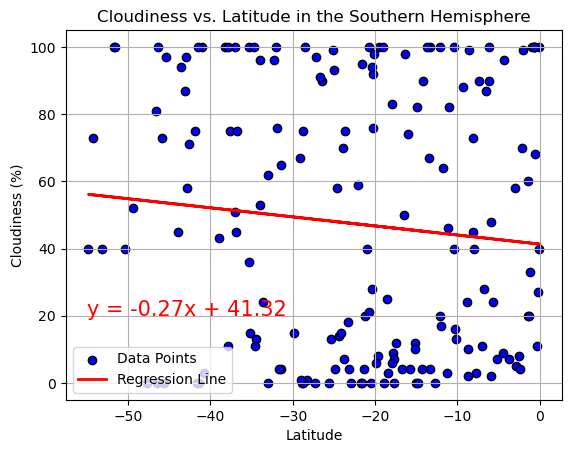

In [219]:
# Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df['Lat'],
    southern_hemi_df['Cloudiness'],
    ann_x = -55, 
    ann_y = 20,
    x_label='Latitude',
    y_label='Cloudiness (%)',
    title='Cloudiness vs. Latitude in the Southern Hemisphere'
)

**Discussion about the linear relationship:** The linear regression analysis between cloudiness and latitude often shows little to no clear relationship. Proximity to large bodies of water or humid regions can increase cloudiness, while dry inland areas, regardless of latitude, often have less cloud cover.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.026619987596534056


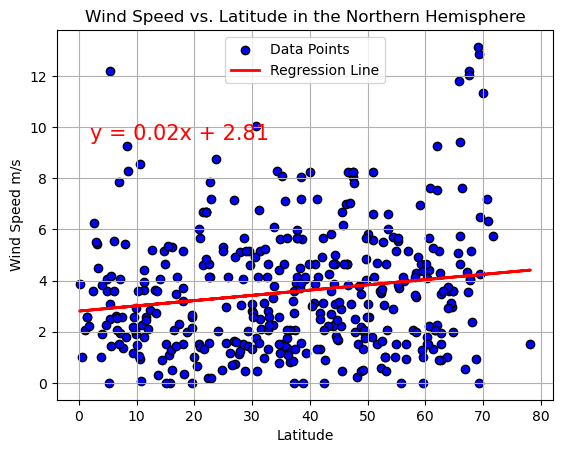

In [24]:
# Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Wind Speed'],
    ann_x = 2, 
    ann_y = 9.5,
    x_label='Latitude',
    y_label='Wind Speed m/s',
    title='Wind Speed vs. Latitude in the Northern Hemisphere'
)

The r^2-value is: 0.07989327383431684


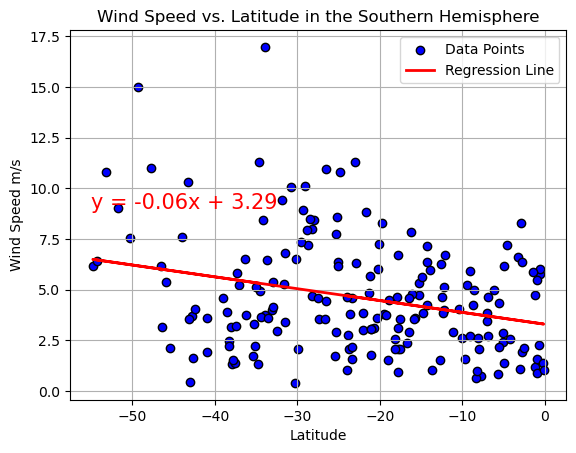

In [25]:
# Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df['Lat'],
    southern_hemi_df['Wind Speed'],
    ann_x = -55, 
    ann_y = 9,
    x_label='Latitude',
    y_label='Wind Speed m/s',
    title='Wind Speed vs. Latitude in the Southern Hemisphere'
)

**Discussion about the linear relationship:** Global atmospheric circulation does create some regional wind patterns based on latitude, the relationship between wind speed and latitude is weak due to the strong influence of other factors. 